# Imports

In [170]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score
import warnings
from itertools import combinations
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_csv('/home/ander/Documentos/2-CIENCIA_DADOS_DSA/1-MATEMATICA_ESTATISTICA_DSA/Cap16/dataset.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.478,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [88]:
#Ajustando as colunas
df.columns = df.columns.str.lower()\
                        .str.strip()\
                            .str.replace('  ',' ')\
                                .str.replace(' ','_')\
                                    .str.replace('-','_')

In [89]:
# Selecionando as variáveis
df = df.loc[:,['country',
    'life_expectancy',
    'year',
    'status',
    'adult_mortality',
    'infant_deaths',
    'alcohol',
    'hepatitis_b',
    'measles',
    'bmi',
    'polio',
    'diphtheria',
    'hiv/aids',
    'gdp',
    'total_expenditure',
    'thinness_1_19_years',
    'thinness_5_9_years',
    'schooling',
    'population']]

In [90]:
# Verificando o shape
df.shape

(2938, 19)

In [91]:
# Cria um dicionário com a descrição de cada variável
dsa_df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

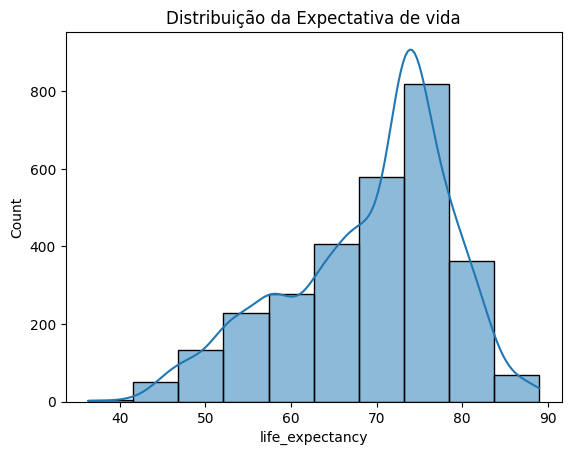

In [92]:
fig, ax = plt.subplots()
sns.histplot(df, x = 'life_expectancy', bins=10, kde=True, ax = ax)
ax.set_title('Distribuição da Expectativa de vida');


In [93]:
# Describe de variáveis numéricas
df.describe()

,life_expectancy,year,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv/aids,gdp,total_expenditure,thinness_1_19_years,thinness_5_9_years,schooling,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [94]:
# Describe de variáveis categóricas
df.describe(include='object')

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [95]:
# Verificando os valores nulos (Se tivermos mais de 50% de valores ausentes, descartamos essas variáveis)
df.isna().sum().sort_values(ascending=False) / df.shape[0]*100

population             22.191967
hepatitis_b            18.822328
gdp                    15.248468
total_expenditure       7.692308
alcohol                 6.603131
schooling               5.547992
bmi                     1.157250
thinness_1_19_years     1.157250
thinness_5_9_years      1.157250
diphtheria              0.646698
polio                   0.646698
life_expectancy         0.340368
adult_mortality         0.340368
year                    0.000000
country                 0.000000
measles                 0.000000
infant_deaths           0.000000
status                  0.000000
hiv/aids                0.000000
dtype: float64

In [96]:
num_vars = df.select_dtypes(exclude='object').columns.tolist()

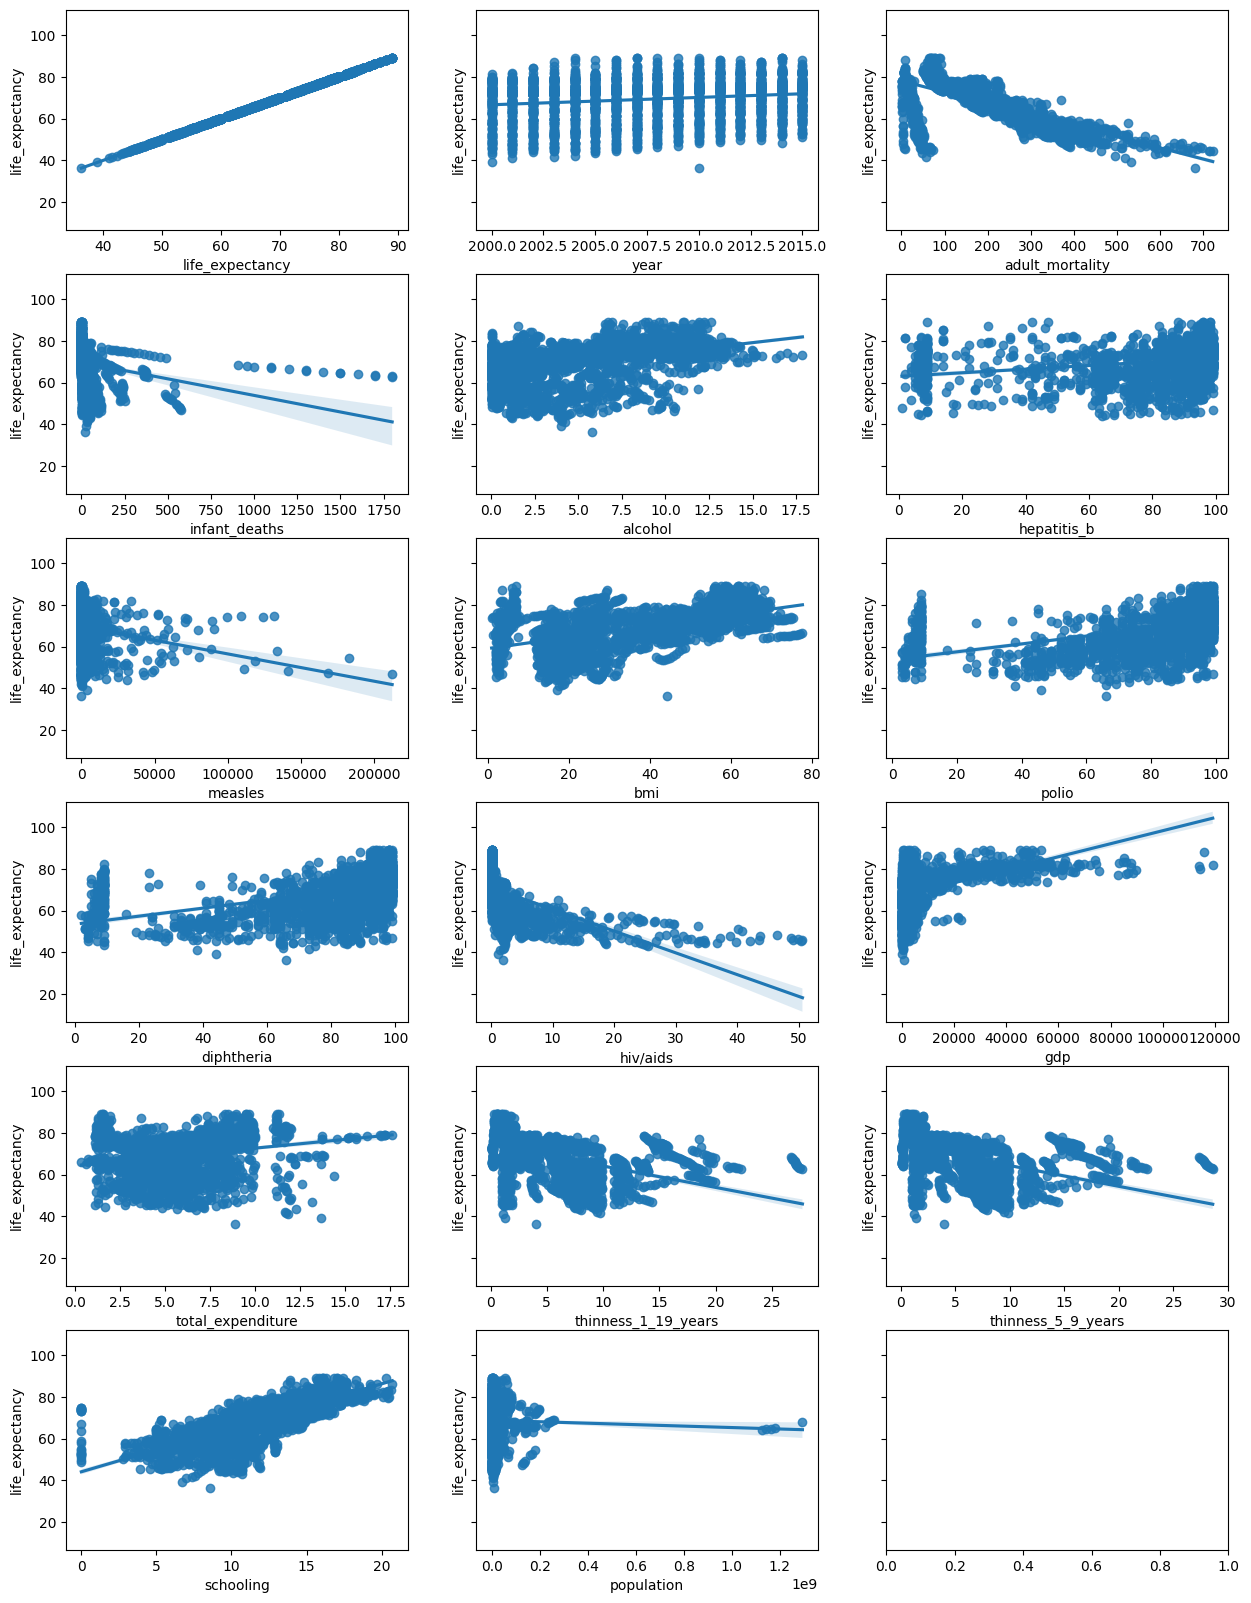

In [97]:
fig, ax = plt.subplots(6,3, figsize = (15,20), sharey=True)
for i, name in enumerate(num_vars):
    row = i//3
    col = i%3
    sns.regplot(data=df, x=name, y='life_expectancy', ax=ax[row, col])
    #print(row, col, name)

# Detectando Outliers

In [98]:
# Atributos com mais de 5% de valores missing.
atributos = (df.isna().sum() / df.shape[0]).sort_values(ascending=False)[0:6].index.tolist()
atributos

['population',
 'hepatitis_b',
 'gdp',
 'total_expenditure',
 'alcohol',
 'schooling']

In [99]:
df_new = df[atributos]
df_new

,population,hepatitis_b,gdp,total_expenditure,alcohol,schooling
0,33736494.0,65.0,584.259210,8.16,0.01,10.1
1,327582.0,62.0,612.696514,8.18,0.01,10.0
2,31731688.0,64.0,631.744976,8.13,0.01,9.9
3,3696958.0,67.0,669.959000,8.52,0.01,9.8
4,2978599.0,68.0,63.537231,7.87,0.01,9.5
...,...,...,...,...,...,...
2933,12777511.0,68.0,454.366654,7.13,4.36,9.2
2934,12633897.0,7.0,453.351155,6.52,4.06,9.5
2935,125525.0,73.0,57.348340,6.53,4.43,10.0
2936,12366165.0,76.0,548.587312,6.16,1.72,9.8


In [100]:
# Identificação de Outliers
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1


In [101]:
# Encontrando a quantidade de outliers por variável
outliers = ((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum()
outliers

population           294
hepatitis_b          254
gdp                  365
total_expenditure     32
alcohol                0
schooling             44
dtype: int64

In [102]:
# Encontrando o Percentual de outliers por variáveis
outliers_summary = pd.DataFrame({'outliers':outliers, 'percentual':(outliers / df_new.shape[0])*100})
outliers_summary

,outliers,percentual
population,294,10.006807
hepatitis_b,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
alcohol,0,0.000000
schooling,44,1.497617


# Análise Estatística para Tratamento de Outliers

In [103]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [104]:
df_new = df[~((df_new < lower_limit) | (df_new > upper_limit)).any(axis=1)]

In [105]:
df_new.describe()

,life_expectancy,year,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv/aids,gdp,total_expenditure,thinness_1_19_years,thinness_5_9_years,schooling,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


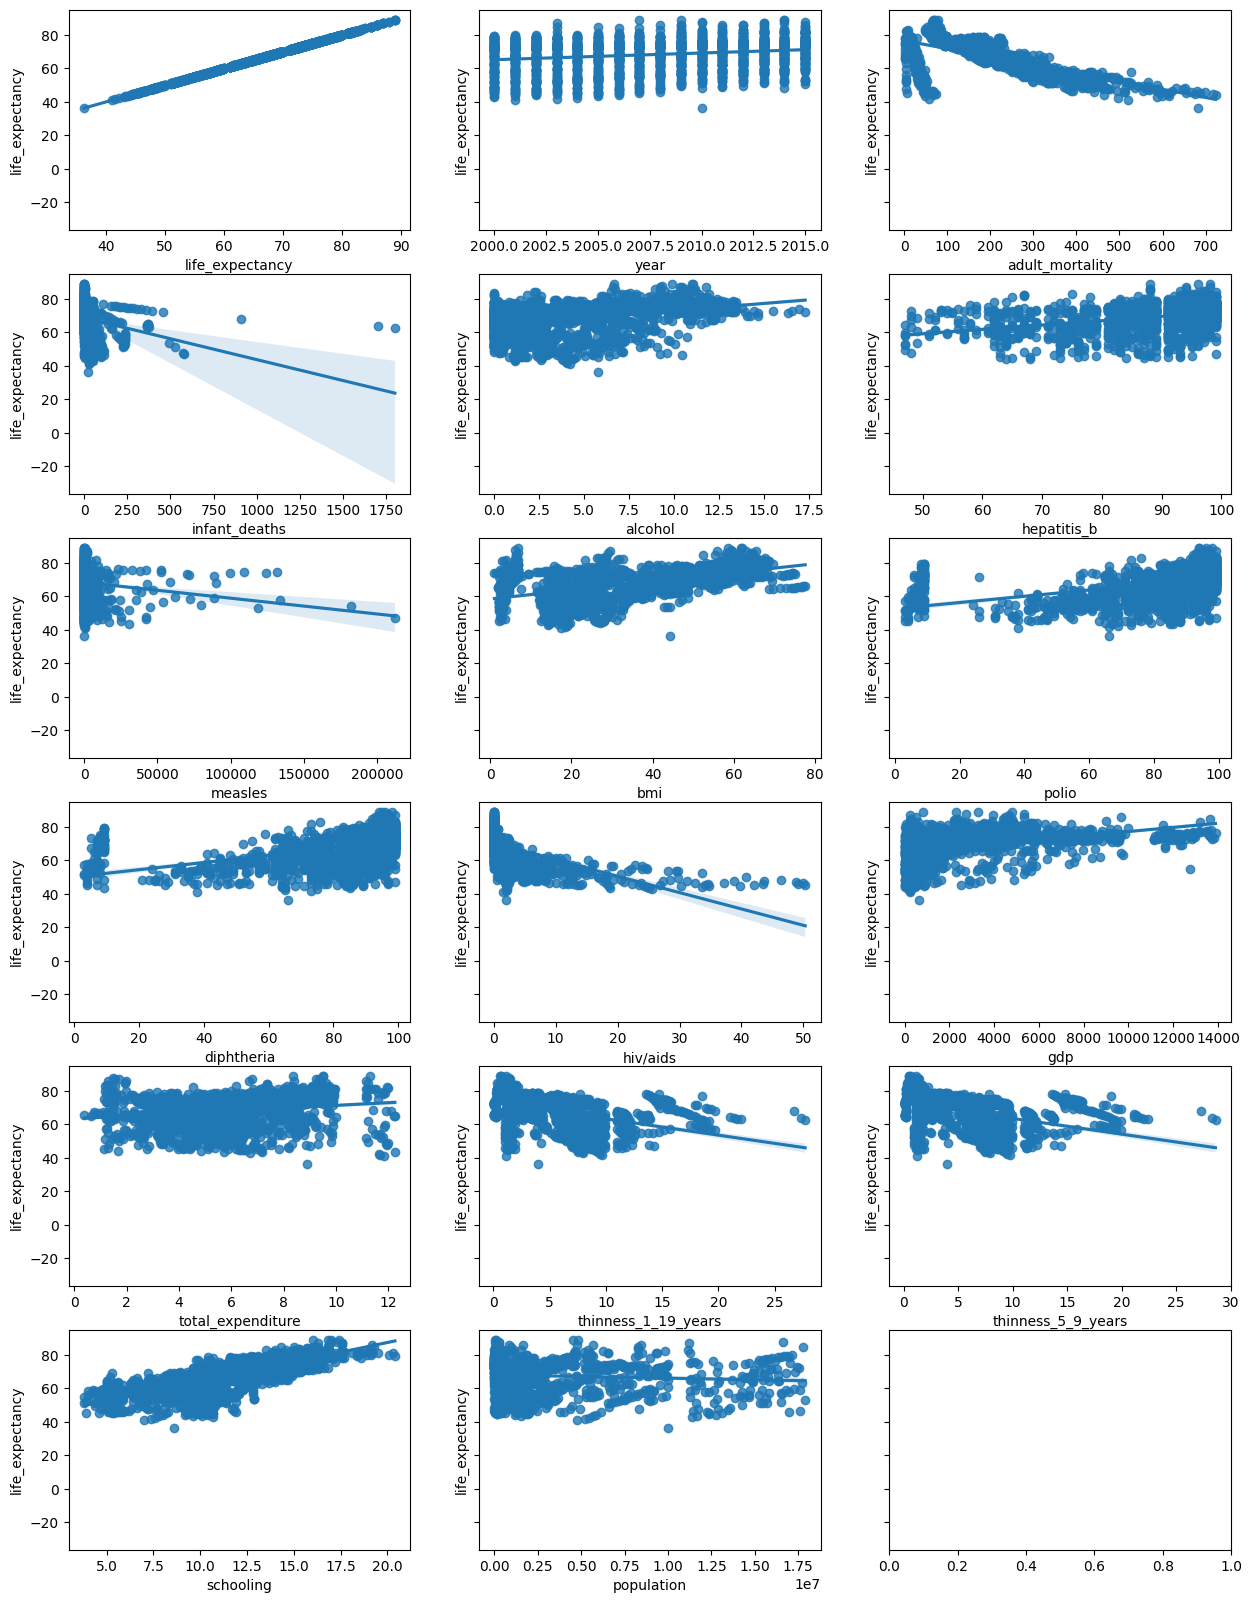

In [106]:
fig, ax = plt.subplots(6,3, figsize = (15,20), sharey=True)
for i, name in enumerate(num_vars):
    row = i//3
    col = i%3
    sns.regplot(data=df_new, x=name, y='life_expectancy', ax=ax[row, col])
    #print(row, col, name)

In [107]:
# verificando o percentual de nulos após a remoção de outliers
nulls_summary = (df_new.isnull().sum().sort_values(ascending = False) / df_new.shape[0])*100
nulls_summary

population             24.168297
hepatitis_b            19.129159
gdp                    18.395303
total_expenditure       7.876712
alcohol                 6.653620
schooling               6.555773
bmi                     0.587084
thinness_1_19_years     0.587084
thinness_5_9_years      0.587084
life_expectancy         0.391389
adult_mortality         0.391389
diphtheria              0.146771
polio                   0.146771
year                    0.000000
country                 0.000000
measles                 0.000000
infant_deaths           0.000000
status                  0.000000
hiv/aids                0.000000
dtype: float64

In [108]:
# função de imputação da mediana
def median_imputer(df, cols):
    df_no_null = df.copy()
    for col in cols:
        df_no_null[col] = df_no_null[col].fillna(df_no_null[col].median(numeric_only=True))
    return df_no_null

In [109]:
# Imputando a mediana
df_new = median_imputer(df_new, atributos)

In [110]:
# Verificando os nulos após o imputer
nulls_summary = (df_new.isnull().sum().sort_values(ascending = False) / df_new.shape[0])*100
nulls_summary

thinness_1_19_years    0.587084
thinness_5_9_years     0.587084
bmi                    0.587084
life_expectancy        0.391389
adult_mortality        0.391389
polio                  0.146771
diphtheria             0.146771
year                   0.000000
country                0.000000
alcohol                0.000000
status                 0.000000
hepatitis_b            0.000000
measles                0.000000
infant_deaths          0.000000
hiv/aids               0.000000
total_expenditure      0.000000
gdp                    0.000000
schooling              0.000000
population             0.000000
dtype: float64

In [111]:
# Remove registros com valores nulos. Estamos considerando uma taxa de nulos menor que 1%
df_new.dropna(inplace=True)

In [112]:
# Verificando os nulos após o imputer
nulls_summary = (df_new.isnull().sum().sort_values(ascending = False) / df_new.shape[0])*100
nulls_summary

country                0.0
life_expectancy        0.0
year                   0.0
status                 0.0
adult_mortality        0.0
infant_deaths          0.0
alcohol                0.0
hepatitis_b            0.0
measles                0.0
bmi                    0.0
polio                  0.0
diphtheria             0.0
hiv/aids               0.0
gdp                    0.0
total_expenditure      0.0
thinness_1_19_years    0.0
thinness_5_9_years     0.0
schooling              0.0
population             0.0
dtype: float64

In [113]:
df.shape, df_new.shape 

((2938, 19), (2023, 19))

# Feature Engineering (Engenharia de Atributos)

In [114]:
cortes = [df_new.population.quantile(0), df_new.population.quantile(0.33), df_new.population.quantile(0.67), df_new.population.quantile(1)]
cortes

[np.float64(34.0),
 np.float64(656519.86),
 np.float64(1365811.6),
 np.float64(17899562.0)]

In [115]:
# Criando a coluna pop_size para segmentar as populações
df_new['pop_size'] = pd.cut(df_new.population, bins= cortes, labels=[1, 2, 3])

<Axes: xlabel='alcohol', ylabel='bmi'>

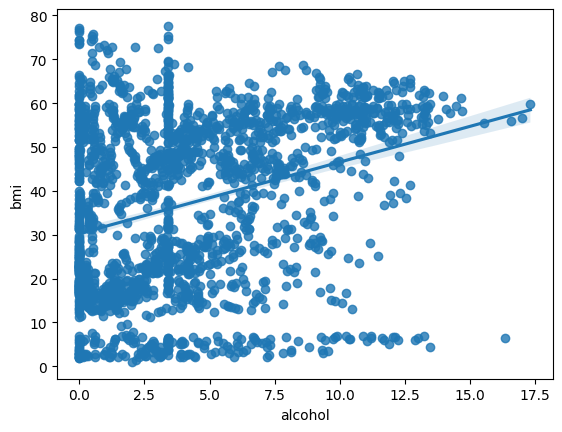

In [116]:
sns.regplot(df_new, x = 'alcohol', y = 'bmi')

In [117]:
# Criando nova variável
df_new['lifestyle'] = df_new['bmi'] * df_new['alcohol']

In [118]:
df_new.head()

,country,life_expectancy,year,status,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,total_expenditure,thinness_1_19_years,thinness_5_9_years,schooling,population,pop_size,lifestyle
1,Afghanistan,59.9,2014,Developing,271.0,64,0.01,62.0,492,18.6,...,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0,1,0.186
3,Afghanistan,59.5,2012,Developing,272.0,69,0.01,67.0,2787,17.6,...,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0,3,0.176
4,Afghanistan,59.2,2011,Developing,275.0,71,0.01,68.0,3013,17.2,...,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0,3,0.172
5,Afghanistan,58.8,2010,Developing,279.0,74,0.01,66.0,1989,16.7,...,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0,3,0.167
6,Afghanistan,58.6,2009,Developing,281.0,77,0.01,63.0,2861,16.2,...,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0,1,0.162


In [119]:
df_new['lifestyle'].describe()

count    2023.000000
mean      178.996408
std       209.416553
min         0.018000
25%        18.140500
50%        95.323000
75%       257.394000
max      1036.869000
Name: lifestyle, dtype: float64

In [120]:
# Verifique os valores ausentes novamente
df_new.isna().sum()

country                0
life_expectancy        0
year                   0
status                 0
adult_mortality        0
infant_deaths          0
alcohol                0
hepatitis_b            0
measles                0
bmi                    0
polio                  0
diphtheria             0
hiv/aids               0
gdp                    0
total_expenditure      0
thinness_1_19_years    0
thinness_5_9_years     0
schooling              0
population             0
pop_size               1
lifestyle              0
dtype: int64

# Análise de Correlação para Verificar Multicolinearidade

In [121]:
# Correlação das variaveis numéricas no conjunto de dados
df_corr = df_new.corr(numeric_only=True)
df_corr

,life_expectancy,year,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv/aids,gdp,total_expenditure,thinness_1_19_years,thinness_5_9_years,schooling,population,lifestyle
life_expectancy,1.000000,0.204556,-0.658916,-0.206443,0.342425,0.257860,-0.115350,0.557954,0.452564,0.483659,-0.573127,0.360736,0.175738,-0.433580,-0.429357,0.708272,-0.105317,0.441366
year,0.204556,1.000000,-0.091760,-0.059838,-0.066639,-0.003178,-0.064347,0.096763,0.147489,0.228939,-0.158820,0.170945,0.070267,-0.059353,-0.055950,0.219471,0.020981,-0.017373
adult_mortality,-0.658916,-0.091760,1.000000,0.099370,-0.149204,-0.188950,0.035432,-0.366745,-0.228938,-0.221803,0.512978,-0.197863,-0.090963,0.299104,0.302507,-0.383901,0.096768,-0.231128
infant_deaths,-0.206443,-0.059838,0.099370,1.000000,-0.127545,-0.122515,0.480129,-0.221948,-0.183569,-0.183910,0.039115,-0.120331,-0.121871,0.321487,0.354512,-0.214215,0.111901,-0.156769
alcohol,0.342425,-0.066639,-0.149204,-0.127545,1.000000,0.193844,-0.045324,0.310448,0.187916,0.199958,-0.036268,0.289360,0.262657,-0.386629,-0.379482,0.464657,-0.007040,0.878858
hepatitis_b,0.257860,-0.003178,-0.188950,-0.122515,0.193844,1.000000,-0.043089,0.115409,0.393191,0.391270,-0.090390,0.167829,0.046093,-0.086406,-0.102546,0.263879,-0.056455,0.181579
measles,-0.115350,-0.064347,0.035432,0.480129,-0.045324,-0.043089,1.000000,-0.142187,-0.110853,-0.123043,0.024412,-0.065666,-0.101675,0.133515,0.137056,-0.089084,-0.005326,-0.085123
bmi,0.557954,0.096763,-0.366745,-0.221948,0.310448,0.115409,-0.142187,1.000000,0.253961,0.273612,-0.244626,0.323198,0.200959,-0.541904,-0.550691,0.552766,-0.056945,0.599062
polio,0.452564,0.147489,-0.228938,-0.183569,0.187916,0.393191,-0.110853,0.253961,1.000000,0.676507,-0.143756,0.198453,0.141294,-0.166819,-0.166363,0.382712,-0.045542,0.219793
diphtheria,0.483659,0.228939,-0.221803,-0.183910,0.199958,0.391270,-0.123043,0.273612,0.676507,1.000000,-0.154179,0.222266,0.157976,-0.189487,-0.186992,0.430627,-0.035142,0.225132


In [122]:
# Avaliando a correlação com a Variavel alvo
df_corr_alvo = df_corr[((df_corr >= 0.3) | (df_corr <= -0.3)) & (df_corr != 1)]['life_expectancy'].sort_values(ascending = False)
df_corr_alvo

schooling              0.708272
bmi                    0.557954
diphtheria             0.483659
polio                  0.452564
lifestyle              0.441366
gdp                    0.360736
alcohol                0.342425
thinness_5_9_years    -0.429357
thinness_1_19_years   -0.433580
hiv/aids              -0.573127
adult_mortality       -0.658916
life_expectancy             NaN
year                        NaN
infant_deaths               NaN
hepatitis_b                 NaN
measles                     NaN
total_expenditure           NaN
population                  NaN
Name: life_expectancy, dtype: float64

In [123]:
vars_to_keep = df_corr_alvo.dropna().index.tolist()
df_new = df_new.loc[:,vars_to_keep + ['life_expectancy']]

In [124]:
def remove_correlated_vars(df_corr, df_main):

    '''Remove variaveis correalacionadas comparando com o Target'''

    vars_to_drop = []
    cols_combinations = list(combinations(df_corr.drop('life_expectancy', axis = 1).columns,2))

    for pair in cols_combinations:
        value = df_corr.loc[pair[0], pair[1]]
        if (pair[0] != pair[1]) and value >= 0.8:
            print(f'{pair[1]} <-> {pair[0]}: {value}')
            if df_corr.loc["life_expectancy",pair[1]] > df_corr.loc[pair[0],"life_expectancy"]:
                vars_to_drop.append(pair[0])
                print(f'Maior correlação com target: {pair[1]}\n')
            else:
                vars_to_drop.append(pair[1])
                print(f'Maior correlação com target: {pair[0]}\n')
                
    print(f'As variáveis {vars_to_drop} foram removidas!')

    df_main.drop(columns = vars_to_drop, inplace = True)

    return df_main


In [125]:
df_new = remove_correlated_vars(df_corr, df_new)

lifestyle <-> alcohol: 0.8788583119136146
Maior correlação com target: lifestyle

thinness_5_9_years <-> thinness_1_19_years: 0.9468143164407058
Maior correlação com target: thinness_5_9_years

As variáveis ['alcohol', 'thinness_1_19_years'] foram removidas!


In [126]:
df_new

,schooling,bmi,diphtheria,polio,lifestyle,gdp,thinness_5_9_years,hiv/aids,adult_mortality,life_expectancy
1,10.0,18.6,62.0,58.0,0.186,612.696514,17.5,0.1,271.0,59.9
3,9.8,17.6,67.0,67.0,0.176,669.959000,18.0,0.1,272.0,59.5
4,9.5,17.2,68.0,68.0,0.172,63.537231,18.2,0.1,275.0,59.2
5,9.2,16.7,66.0,66.0,0.167,553.328940,18.4,0.1,279.0,58.8
6,8.9,16.2,63.0,63.0,0.162,445.893298,18.7,0.1,281.0,58.6
...,...,...,...,...,...,...,...,...,...,...
2932,9.3,27.5,68.0,69.0,113.850,444.765750,9.0,30.3,717.0,44.6
2933,9.2,27.1,65.0,67.0,118.156,454.366654,9.4,33.6,723.0,44.3
2935,10.0,26.3,71.0,73.0,116.509,57.348340,1.3,39.8,73.0,44.8
2936,9.8,25.9,75.0,76.0,44.548,548.587312,1.7,42.1,686.0,45.3


In [127]:
def remove_vars_by_vif(df, target:str) -> pd.DataFrame:

    '''Remove as variáveis de Acordo com o VIF'''
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                            for i in range(len(df.columns))]
    
    vars_to_drop = vif_data.query('VIF >= 5 and feature != @target').feature.tolist()

    df_result = df.copy()
    df_result.drop(columns= vars_to_drop, inplace = True)

    print(vif_data)
    print()
    print(f'As Variaveis {vars_to_drop} foram removidas!')

    return df_result

In [128]:
df_new = remove_vars_by_vif(df_new, 'life_expectancy')

              feature        VIF
0           schooling  50.473951
1                 bmi   9.850878
2          diphtheria  35.413586
3               polio  29.042424
4           lifestyle   3.015262
5                 gdp   2.191123
6  thinness_5_9_years   3.513608
7            hiv/aids   1.675830
8     adult_mortality   3.833280
9     life_expectancy  72.513545

As Variaveis ['schooling', 'bmi', 'diphtheria', 'polio'] foram removidas!


# Usando ML para a Seleção de variáveis

In [129]:
X = df_new.drop('life_expectancy', axis = 1)
y = df_new['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [130]:
modelo = RandomForestRegressor(n_estimators= 100, random_state= 42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [131]:
y_pred = modelo.predict(X_test)

In [132]:
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

RMSE: 2.2247497143179995
R²: 0.942607605416915


In [133]:
# Identificando a Importancia das variaveis
importancias = modelo.feature_importances_
variaveis = modelo.feature_names_in_
df_importancias = pd.DataFrame({'variaveis':variaveis,'importancias':importancias})
df_importancias = df_importancias.sort_values('importancias', ascending=False)
df_importancias

,variaveis,importancias
3,hiv/aids,0.612750
4,adult_mortality,0.259900
2,thinness_5_9_years,0.055547
0,lifestyle,0.051903
1,gdp,0.019901


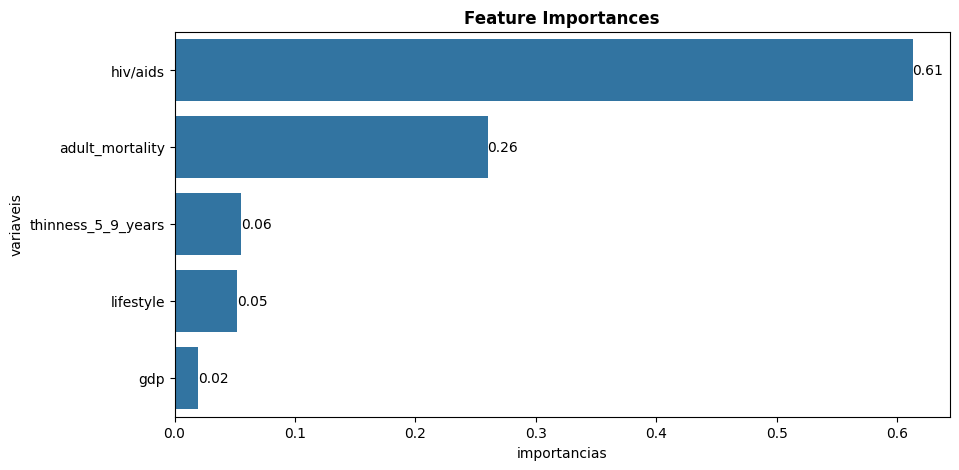

In [134]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = df_importancias, x = 'importancias', y = 'variaveis')
plt.bar_label(ax.containers[0], fmt = '%.2f')
plt.title('Feature Importances', fontweight = 'bold')
plt.show()

In [135]:
df_model = df_new.drop('gdp', axis=1).copy()
df_model

,lifestyle,thinness_5_9_years,hiv/aids,adult_mortality,life_expectancy
1,0.186,17.5,0.1,271.0,59.9
3,0.176,18.0,0.1,272.0,59.5
4,0.172,18.2,0.1,275.0,59.2
5,0.167,18.4,0.1,279.0,58.8
6,0.162,18.7,0.1,281.0,58.6
...,...,...,...,...,...
2932,113.850,9.0,30.3,717.0,44.6
2933,118.156,9.4,33.6,723.0,44.3
2935,116.509,1.3,39.8,73.0,44.8
2936,44.548,1.7,42.1,686.0,45.3


# Pré-Processamento de Dados e Modelagem

## Regressão Linear Padrão

In [136]:
X = df_model.drop('life_expectancy', axis = 1)
y = df_model['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [137]:
scaler = StandardScaler()
modelo_linear = LinearRegression()
pipeline_v1 = Pipeline([('preprocessor', scaler), ('model', modelo_linear)])

In [138]:
pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model', LinearRegression())])

In [139]:
y_pred_train_v1 = pipeline_v1.predict(X_train)
y_pred_test_v1 = pipeline_v1.predict(X_test)

In [140]:
print(f'RMSE de Treino: {root_mean_squared_error(y_train, y_pred_train_v1)}')
print(f'RMSE de Teste: {root_mean_squared_error(y_test, y_pred_test_v1)}')
print(f'R2 de Treino: {r2_score(y_train, y_pred_train_v1)}')
print(f'R2 de Teste: {r2_score(y_test, y_pred_test_v1)}')

RMSE de Treino: 5.773781089234569
RMSE de Teste: 5.662835009436973
R2 de Treino: 0.6019946312465121
R2 de Teste: 0.628156801109946


### Cross Validation Scores

In [141]:
scores = cross_validate(pipeline_v1, X_train, y_train, cv = 10, scoring=['neg_root_mean_squared_error','r2'])
print(f'Média do RMSE {scores["test_neg_root_mean_squared_error"].mean() * -1}')
print(f'Desvio padrão do RMSE: {scores["test_neg_root_mean_squared_error"].std()}')
print(f'Média do R2 {scores["test_r2"].mean()}')
print(f'Desvio padrão do R2: {scores["test_r2"].std()}')

Média do RMSE 5.811107752740112
Desvio padrão do RMSE: 0.38098358408745847
Média do R2 0.5916541388839772
Desvio padrão do R2: 0.04921974418826925


## Ridge Regression (L2)

In [142]:
scaler = StandardScaler()
modelo_linear = Ridge(alpha = 1.0)
pipeline_v2 = Pipeline([('preprocessor', scaler), ('model', modelo_linear)])

In [143]:
pipeline_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()), ('model', Ridge())])

In [144]:
y_pred_train_v2 = pipeline_v2.predict(X_train)
y_pred_test_v2 = pipeline_v2.predict(X_test)

In [145]:
print(f'RMSE de Treino: {root_mean_squared_error(y_train, y_pred_train_v2)}')
print(f'RMSE de Teste: {root_mean_squared_error(y_test, y_pred_test_v2)}')
print(f'R2 de Treino: {r2_score(y_train, y_pred_train_v2)}')
print(f'R2 de Teste: {r2_score(y_test, y_pred_test_v2)}')

RMSE de Treino: 5.773781634413719
RMSE de Teste: 5.663025569795915
R2 de Treino: 0.601994556084591
R2 de Teste: 0.6281317748587608


### Cross Validation Scores (Ridge)

In [146]:
scores = cross_validate(pipeline_v2, X_train, y_train, cv = 10, scoring=['neg_root_mean_squared_error','r2'])
print(f'Média do RMSE {scores["test_neg_root_mean_squared_error"].mean() * -1}')
print(f'Desvio padrão do RMSE: {scores["test_neg_root_mean_squared_error"].std()}')
print(f'Média do R2 {scores["test_r2"].mean()}')
print(f'Desvio padrão do R2: {scores["test_r2"].std()}')

Média do RMSE 5.811063349586098
Desvio padrão do RMSE: 0.3807186799116627
Média do R2 0.5916614601292325
Desvio padrão do R2: 0.04919364579888104


## Lasso Regression (L1)

In [147]:
scaler = StandardScaler()
modelo_linear = Lasso(alpha = 1.0)
pipeline_v3 = Pipeline([('preprocessor', scaler), ('model', modelo_linear)])

In [148]:
pipeline_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()), ('model', Lasso())])

In [149]:
y_pred_train_v3 = pipeline_v3.predict(X_train)
y_pred_test_v3 = pipeline_v3.predict(X_test)

In [150]:
print(f'RMSE de Treino: {root_mean_squared_error(y_train, y_pred_train_v3)}')
print(f'RMSE de Teste: {root_mean_squared_error(y_test, y_pred_test_v3)}')
print(f'R2 de Treino: {r2_score(y_train, y_pred_train_v3)}')
print(f'R2 de Teste: {r2_score(y_test, y_pred_test_v3)}')

RMSE de Treino: 5.954477048908792
RMSE de Teste: 5.872124095600582
R2 de Treino: 0.5766928986808912
R2 de Teste: 0.6001634644820767


### Cross Validation Scores (Lasso L1)

In [151]:
scores = cross_validate(pipeline_v3, X_train, y_train, cv = 10, scoring=['neg_root_mean_squared_error','r2'])
print(f'Média do RMSE {scores["test_neg_root_mean_squared_error"].mean() * -1}')
print(f'Desvio padrão do RMSE: {scores["test_neg_root_mean_squared_error"].std()}')
print(f'Média do R2 {scores["test_r2"].mean()}')
print(f'Desvio padrão do R2: {scores["test_r2"].std()}')

Média do RMSE 5.98328134938088
Desvio padrão do RMSE: 0.37177491964007114
Média do R2 0.5672601286599457
Desvio padrão do R2: 0.0500740467282917


## Regressão Elastic Net
Lasso + Ridge

In [152]:
scaler = StandardScaler()
modelo_linear = ElasticNet(alpha = 1.0, l1_ratio= 0.5)
pipeline_v4 = Pipeline([('preprocessor', scaler), ('model', modelo_linear)])

In [153]:
pipeline_v4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()), ('model', ElasticNet())])

In [154]:
y_pred_train_v4 = pipeline_v4.predict(X_train)
y_pred_test_v4 = pipeline_v4.predict(X_test)

In [155]:
print(f'RMSE de Treino: {root_mean_squared_error(y_train, y_pred_train_v4)}')
print(f'RMSE de Teste: {root_mean_squared_error(y_test, y_pred_test_v4)}')
print(f'R2 de Treino: {r2_score(y_train, y_pred_train_v4)}')
print(f'R2 de Teste: {r2_score(y_test, y_pred_test_v4)}')

RMSE de Treino: 6.137317539500442
RMSE de Teste: 6.1295388220701925
R2 de Treino: 0.5502973045592877
R2 de Teste: 0.5643400614108174


### Cross Validation Scores (Elastic Net)

In [156]:
scores = cross_validate(pipeline_v4, X_train, y_train, cv = 10, scoring=['neg_root_mean_squared_error','r2'])
print(f'Média do RMSE {scores["test_neg_root_mean_squared_error"].mean() * -1}')
print(f'Desvio padrão do RMSE: {scores["test_neg_root_mean_squared_error"].std()}')
print(f'Média do R2 {scores["test_r2"].mean()}')
print(f'Desvio padrão do R2: {scores["test_r2"].std()}')

Média do RMSE 6.151513174238149
Desvio padrão do RMSE: 0.30147412155840636
Média do R2 0.5432718816159391
Desvio padrão do R2: 0.04029638514081704


## Regressão Ridge + Otimização de Hiperparâmetros

In [157]:
scaler = StandardScaler()
modelo_linear = Ridge()
pipeline_v5 = Pipeline([('preprocessor', scaler), ('model', modelo_linear)])

In [158]:
grid_parametros = {'model__alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline_v5, 
                           grid_parametros, 
                           cv = 5, 
                           scoring = 'neg_root_mean_squared_error',
                           verbose = 1)

In [159]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [160]:
# Melhor hiperparâmetro
grid_search.best_params_

{'model__alpha': 10}

In [161]:
y_pred_train_v5 = grid_search.predict(X_train)
y_pred_test_v5 = grid_search.predict(X_test)

In [162]:
print(f'RMSE de Treino: {root_mean_squared_error(y_train, y_pred_train_v5)}')
print(f'RMSE de Teste: {root_mean_squared_error(y_test, y_pred_test_v5)}')
print(f'R2 de Treino: {r2_score(y_train, y_pred_train_v5)}')
print(f'R2 de Teste: {r2_score(y_test, y_pred_test_v5)}')

RMSE de Treino: 5.773835175228071
RMSE de Teste: 5.664774992811268
R2 de Treino: 0.6019871745673339
R2 de Teste: 0.6279019841546619


### Cross Validation Scores (Ridge)

In [163]:
scores = cross_validate(grid_search, X_train, y_train, cv = 10, scoring=['neg_root_mean_squared_error','r2'])
print(f'Média do RMSE {scores["test_neg_root_mean_squared_error"].mean() * -1}')
print(f'Desvio padrão do RMSE: {scores["test_neg_root_mean_squared_error"].std()}')
print(f'Média do R2 {scores["test_r2"].mean()}')
print(f'Desvio padrão do R2: {scores["test_r2"].std()}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Média do RMSE 5.810727679267108
Desvio padrão do RMSE: 0.3783635440414869
Média do R2 0.5917182721697731
Desvio padrão do R2: 0.04896216201268547


# Seleção do Melhor Modelo

In [164]:
print(f'RMSE de Teste V1: {root_mean_squared_error(y_test, y_pred_test_v1)}')
print(f'RMSE de Teste V2: {root_mean_squared_error(y_test, y_pred_test_v2)}')
print(f'RMSE de Teste V3: {root_mean_squared_error(y_test, y_pred_test_v3)}')
print(f'RMSE de Teste V4: {root_mean_squared_error(y_test, y_pred_test_v4)}')
print(f'RMSE de Teste V5: {root_mean_squared_error(y_test, y_pred_test_v5)}')
print()
print(f'R2 de Teste V1: {r2_score(y_test, y_pred_test_v1)}')
print(f'R2 de Teste V2: {r2_score(y_test, y_pred_test_v2)}')
print(f'R2 de Teste V3: {r2_score(y_test, y_pred_test_v3)}')
print(f'R2 de Teste V4: {r2_score(y_test, y_pred_test_v4)}')
print(f'R2 de Teste V5: {r2_score(y_test, y_pred_test_v5)}')

RMSE de Teste V1: 5.662835009436973
RMSE de Teste V2: 5.663025569795915
RMSE de Teste V3: 5.872124095600582
RMSE de Teste V4: 6.1295388220701925
RMSE de Teste V5: 5.664774992811268

R2 de Teste V1: 0.628156801109946
R2 de Teste V2: 0.6281317748587608
R2 de Teste V3: 0.6001634644820767
R2 de Teste V4: 0.5643400614108174
R2 de Teste V5: 0.6279019841546619


O Modelo V1, apesar de sua simplicidade foi o melhor modelo para os dados estudados

## Análise dos resíduos

In [165]:
residuos_treino = y_train - y_pred_train_v1
residuos_teste = y_test - y_pred_test_v1

Text(0.5, 1.0, 'Análise dos Resíduos de Treino')

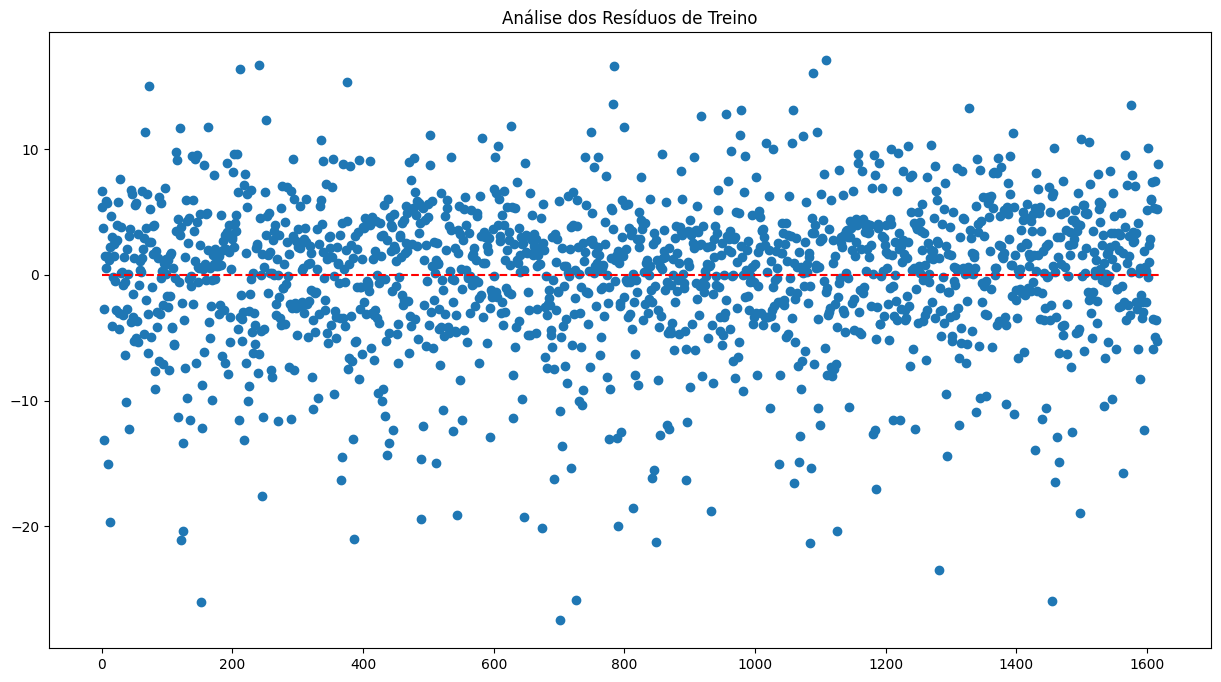

In [166]:
plt.figure(figsize=(15,8))
plt.scatter(x = range(0, len(residuos_treino)), y = residuos_treino)
plt.hlines(y = 0, xmin = 0, xmax = len(residuos_treino), color = 'red', ls= '--')
plt.title('Análise dos Resíduos de Treino')

Text(0.5, 1.0, 'Análise dos Resíduos de Teste')

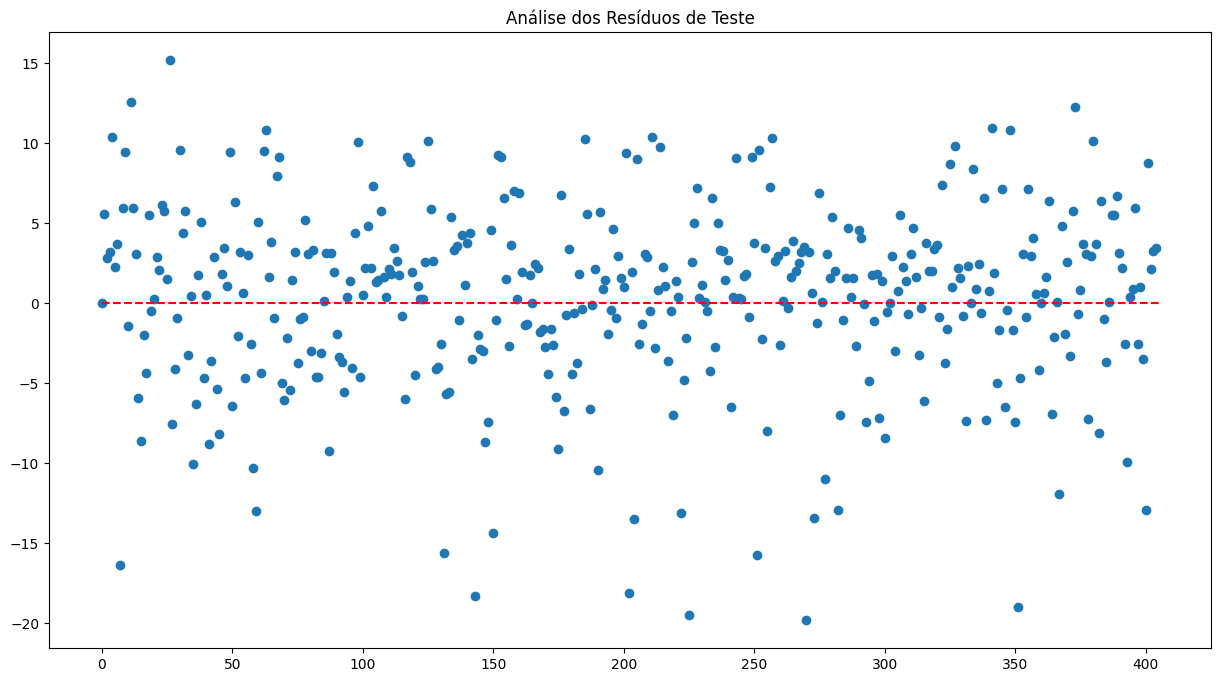

In [167]:
plt.figure(figsize=(15,8))
plt.scatter(x = range(0, len(residuos_teste)), y = residuos_teste)
plt.hlines(y = 0, xmin = 0, xmax = len(residuos_teste), color = 'red', ls= '--')
plt.title('Análise dos Resíduos de Teste')

Salvando Pipeline de Pre processamento e Modelagem para o Deploy

In [172]:
with open('pipeline_v1.pkl', 'wb') as file:
    pickle.dump(pipeline_v1, file)

# Simulação de Deploy

In [173]:
# Carregando a Pipeline
pipe_v1 = pd.read_pickle("pipeline_v1.pkl")

In [174]:
pipe_v1

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model', LinearRegression())])

In [181]:
# Usando uma linha aleatória do df_model como se fossem novos dados
novos_dados = df_model.sample(1, random_state = 42).drop('life_expectancy', axis = 1)
df_model.sample(1, random_state = 42)


,lifestyle,thinness_5_9_years,hiv/aids,adult_mortality,life_expectancy
953,283.5,6.6,8.9,298.0,61.6


In [182]:
# Previsão
pipe_v1.predict(novos_dados)

array([61.56764198])